# CryptoCurrency Price Prediction
* Bitcoin 
* Bitcoin Cash
* Ethereum
* Ripple
* Iota
* Dash
* Monero

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.ar_model import AR

from sklearn.metrics import mean_squared_error

from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from statsmodels.tsa.arima_model import ARIMA

In [2]:
bitcoin_price = pd.read_csv('D:/Msc CS Project Final/Dataset/bitcoin_price.csv', header=0, parse_dates=[0])

In [15]:
bitcoin_price.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-29,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2,2013-04-30,144.00,146.93,134.05,139.00,0.0,1.597780e+09
3,2013-05-01,139.00,139.89,107.72,116.99,0.0,1.542820e+09
4,2013-05-02,116.38,125.60,92.28,105.21,0.0,1.292190e+09


In [16]:
bitcoin_price.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1755,2018-02-16,10135.7,10324.1,9824.82,10233.9,7.296160e+09,1.709600e+11
1756,2018-02-17,10207.5,11139.5,10149.40,11112.7,8.660880e+09,1.721910e+11
1757,2018-02-18,11123.4,11349.8,10326.00,10551.8,8.744010e+09,1.876630e+11
1758,2018-02-19,10552.6,11273.8,10513.20,11225.3,7.652090e+09,1.780550e+11
1759,2018-02-20,11231.8,11958.5,11231.80,11403.7,9.926540e+09,1.895360e+11


In [17]:
bitcoin_price.shape

(1760, 7)

In [18]:
bitcoin_price.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03,1.760000e+03
mean,1479.574239,1536.991108,1418.251273,1485.747000,8.578610e+08,2.381454e+10
std,2950.457188,3092.950362,2780.859459,2959.265478,2.796295e+09,4.971185e+10
min,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.792550e+08
25%,274.730000,279.857500,268.640000,274.875000,1.639130e+07,3.890228e+09
50%,480.715000,495.195000,472.510000,482.810000,4.380440e+07,6.840475e+09
75%,870.085000,900.222500,831.682500,871.370000,1.320840e+08,1.250202e+10
max,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11


In [19]:
bitcoin_price.High.dtype

dtype('float64')

In [20]:
bitcoin_price.Volume.dtype

dtype('float64')

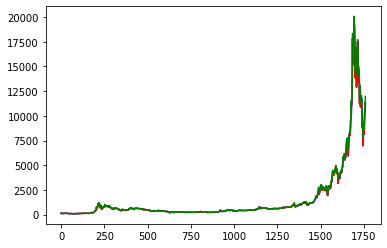

In [21]:
plt.plot(bitcoin_price.Open, color='blue')
plt.plot(bitcoin_price.Close, color='red')
plt.plot(bitcoin_price.High, color = 'green')

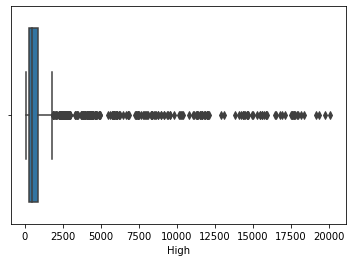

In [121]:
sns.boxplot(bitcoin_price.High)

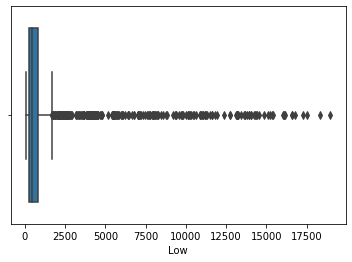

In [122]:
sns.boxplot(bitcoin_price.Low)

In [22]:
bitcoin_price_high = bitcoin_price.iloc[:,[0,2]]
bitcoin_naive = bitcoin_price_high.copy()
bitcoin_price_high.index = bitcoin_price_high.Date
bitcoin_price_high.head()

,Date,High
Date,,
2013-04-28,2013-04-28,135.98
2013-04-29,2013-04-29,147.49
2013-04-30,2013-04-30,146.93
2013-05-01,2013-05-01,139.89
2013-05-02,2013-05-02,125.60


In [23]:
bitcoin_price_high.tail()

,Date,High
Date,,
2018-02-16,2018-02-16,10324.1
2018-02-17,2018-02-17,11139.5
2018-02-18,2018-02-18,11349.8
2018-02-19,2018-02-19,11273.8
2018-02-20,2018-02-20,11958.5


C:\Users\pravi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


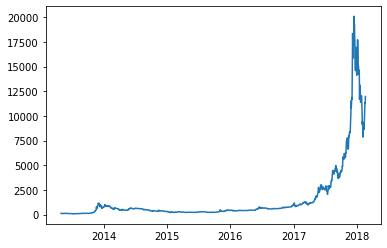

In [24]:
plt.plot(bitcoin_price_high.High)

In [25]:
# Lets create Lag1 Variable - This Variable is Used in Naive (Persistence) Model
bitcoin_price_high['Lag1'] = bitcoin_price_high.High.shift(1)
bitcoin_price_high.head()

C:\Users\pravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,High,Lag1
Date,,,
2013-04-28,2013-04-28,135.98,NaN
2013-04-29,2013-04-29,147.49,135.98
2013-04-30,2013-04-30,146.93,147.49
2013-05-01,2013-05-01,139.89,146.93
2013-05-02,2013-05-02,125.60,139.89


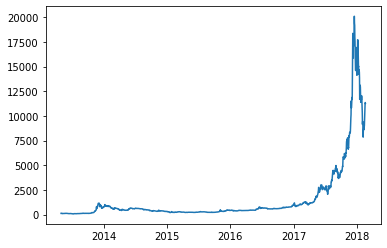

In [26]:
plt.plot(bitcoin_price_high.Lag1)

In [27]:
bitcoin_price_high['High_Diff_1'] = bitcoin_price_high.High.diff(periods = 1)
bitcoin_price_high.head()

C:\Users\pravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,High,Lag1,High_Diff_1
Date,,,,
2013-04-28,2013-04-28,135.98,NaN,NaN
2013-04-29,2013-04-29,147.49,135.98,11.51
2013-04-30,2013-04-30,146.93,147.49,-0.56
2013-05-01,2013-05-01,139.89,146.93,-7.04
2013-05-02,2013-05-02,125.60,139.89,-14.29


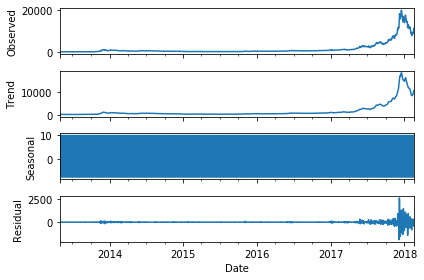

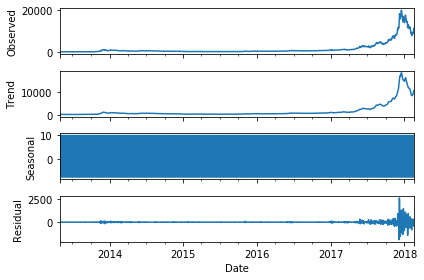

In [28]:
# Lets Decompose and See the Trend and Seasonality
result = seasonal_decompose(bitcoin_price_high.High, model = 'additive')
result.plot()

In [25]:
# Here we can see that the Data has a potential trend but no Seasonality

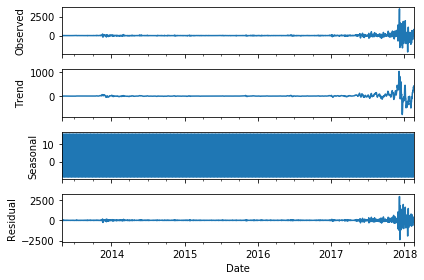

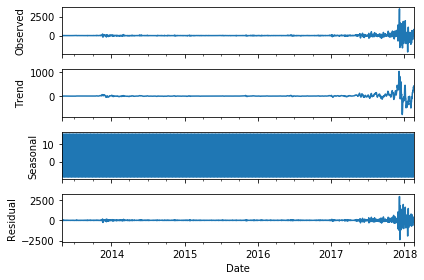

In [29]:
result2 = seasonal_decompose(bitcoin_price_high.iloc[1:,3], model='additive')
result2.plot()

In [26]:
# Now we see that there is no trend.

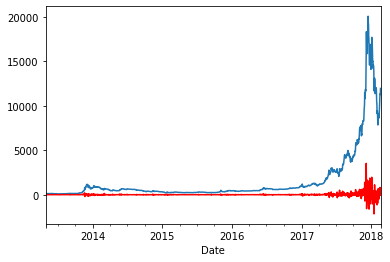

In [30]:
bitcoin_price_high.High.plot()
bitcoin_price_high.High_Diff_1.plot(color='red')

In [31]:
bitcoin_naive = bitcoin_price.iloc[:,[0,2]]
bitcoin_naive.head()

,Date,High
0,2013-04-28,135.98
1,2013-04-29,147.49
2,2013-04-30,146.93
3,2013-05-01,139.89
4,2013-05-02,125.60


In [32]:
bitcoin_naive['Lag1'] = bitcoin_naive.High.shift(1)
bitcoin_naive.head(),bitcoin_naive.tail()

C:\Users\pravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(        Date    High    Lag1
 0 2013-04-28  135.98     NaN
 1 2013-04-29  147.49  135.98
 2 2013-04-30  146.93  147.49
 3 2013-05-01  139.89  146.93
 4 2013-05-02  125.60  139.89,            Date     High     Lag1
 1755 2018-02-16  10324.1  10234.8
 1756 2018-02-17  11139.5  10324.1
 1757 2018-02-18  11349.8  11139.5
 1758 2018-02-19  11273.8  11349.8
 1759 2018-02-20  11958.5  11273.8)

In [33]:
# Lets Divide the Data into Test and Train to check the Accuracy of the Naive(persistence) model.
# We will Consider the Orginal Observation and the Lagged Observation
train_size = int(len(bitcoin_naive)*0.90)
train = bitcoin_naive[1:train_size]
test = bitcoin_naive[train_size:]
print(train.head()), print(test.head())

        Date    High    Lag1
1 2013-04-29  147.49  135.98
2 2013-04-30  146.93  147.49
3 2013-05-01  139.89  146.93
4 2013-05-02  125.60  139.89
5 2013-05-03  108.13  125.60
           Date     High     Lag1
1584 2017-08-29  4625.68  4403.93
1585 2017-08-30  4626.52  4625.68
1586 2017-08-31  4736.05  4626.52
1587 2017-09-01  4892.01  4736.05
1588 2017-09-02  4975.04  4892.01


(None, None)

In [34]:
len(test)

176

In [35]:
train_x, train_y = train.Lag1, train.High
test_x, test_y = test.Lag1, test.High

In [36]:
prediction = test_x.copy()

In [37]:
# Mean Squared error
mse = mean_squared_error(prediction, test_y)
mse

408403.742786932

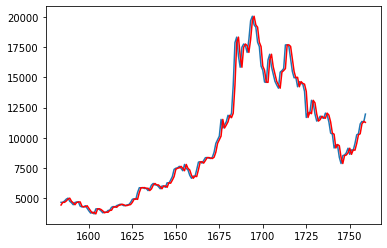

In [38]:
plt.plot(test_y)
plt.plot(prediction, color='red')

In [79]:
# The Mean Squared Error of the Naive Persistence Model is 209868.2541491478
# Lets build Different Advanced Models

## Lets build an Auto Regression Model

In [39]:
bitcoin_high_AR = bitcoin_naive['High']
bitcoin_high_AR.head()

0    135.98
1    147.49
2    146.93
3    139.89
4    125.60
Name: High, dtype: float64

In [40]:
AR_train, AR_test = bitcoin_high_AR.iloc[0:train_size], bitcoin_high_AR[train_size:]

In [41]:
bitcoin_AR_Model = AR(AR_train)

In [42]:
bitcoin_AR_Model_fit = bitcoin_AR_Model.fit()

* No of Lagged Variables

In [43]:
bitcoin_AR_Model_fit.k_ar

24

* To get the Coefficients of the Lagged Variables.

In [44]:
bitcoin_AR_Model_fit.params

const      -1.399345
L1.High     1.114191
L2.High    -0.133582
L3.High     0.067437
L4.High    -0.084618
L5.High     0.040497
L6.High    -0.045982
L7.High     0.065076
L8.High     0.089965
L9.High    -0.254149
L10.High    0.108024
L11.High    0.163700
L12.High   -0.163336
L13.High    0.071140
L14.High   -0.014063
L15.High   -0.025824
L16.High    0.097957
L17.High    0.015387
L18.High   -0.070640
L19.High   -0.129753
L20.High    0.088543
L21.High   -0.076248
L22.High    0.032443
L23.High    0.094343
L24.High   -0.044935
dtype: float64

In [45]:
bitcoin_AR_Predictions = bitcoin_AR_Model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [46]:
# These are the Pedicted Values for Test Set
print(bitcoin_AR_Predictions.head())
print(AR_test.head())
print(bitcoin_AR_Predictions.tail())
print(AR_test.tail())

1583    4543.716709
1584    4441.155144
1585    4508.002064
1586    4557.499156
1587    4532.294493
dtype: float64
1584    4625.68
1585    4626.52
1586    4736.05
1587    4892.01
1588    4975.04
Name: High, dtype: float64
1754    12617.774686
1755    12698.560506
1756    12779.874309
1757    12861.720125
1758    12944.101313
dtype: float64
1755    10324.1
1756    11139.5
1757    11349.8
1758    11273.8
1759    11958.5
Name: High, dtype: float64


In [47]:
bitcoin_AR_mse = mean_squared_error(bitcoin_AR_Predictions, AR_test)
bitcoin_AR_mse

15502279.172641557

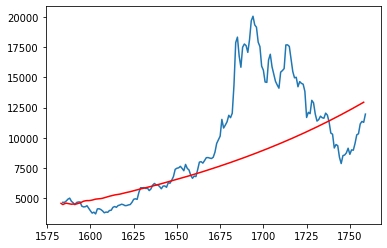

In [48]:
plt.plot(AR_test)
plt.plot(bitcoin_AR_Predictions, color='red')

### Lets Try Walk Forward method for AR model

In [49]:
# we will run a for Loop

data = AR_train
predicts = []
for i in AR_test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(AR_train)+len(AR_test)-1)
    print(y.values[0])
    predicts.append(y.values[0])
    data = np.append(data,i)
    data = pd.Series(data)
    
len(predicts)

4441.155143674932
4724.486413358802
4670.928481702901
4726.7410351477465
4882.534470746809
4976.3087842645755
4692.869896595211
4560.808289450072
4421.733057293529
4646.143176048106
4708.688502894999
4785.81210174421
4299.281817453512
4232.004574684107
4340.532218421868
4366.428990635485
4162.55646494646
3887.1450807903243
3756.6814715005576
3806.6311572953705
3689.8530980754576
4074.610558521665
4040.3777125378006
3893.742620000512
3943.307317540676
3720.9908412442874
3934.190763887083
3712.7675514207826
4035.375151473062
3860.4506808838382
4207.637782602195
4316.053021091287
4195.53054677806
4372.4027171429325
4457.279780205131
4479.357685829379
4468.646905223225
4448.068576065206
4438.764395587627
4415.919911706313
4499.91759089976
4615.165460783379
4861.184635694581
4943.102018657828
4883.587491039321
5595.362466485616
5989.666416048597
5866.972638657082
5891.418525319675
5822.791136773743
5802.824988785653
5570.8262223989195
5871.0343167044
6070.513552446128
6166.697828199077
6130

176

In [50]:
mse = mean_squared_error(AR_test, predicts)
mse

633969.6106228312

* Here we can see that the MSE value is less than the Previous AR Model

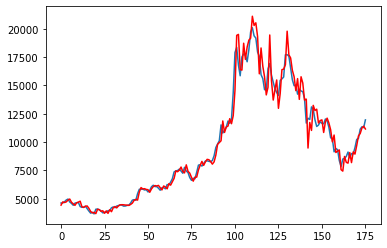

In [51]:
plt.plot(AR_test.values)
plt.plot(predicts, color='red')

## Moving Average with Walk Forward Technique

In [52]:
Moving_Average = bitcoin_price_high.copy()
Moving_Average.head()

,Date,High,Lag1,High_Diff_1
Date,,,,
2013-04-28,2013-04-28,135.98,NaN,NaN
2013-04-29,2013-04-29,147.49,135.98,11.51
2013-04-30,2013-04-30,146.93,147.49,-0.56
2013-05-01,2013-05-01,139.89,146.93,-7.04
2013-05-02,2013-05-02,125.60,139.89,-14.29


In [53]:
# Moving Average means that we build a AR model on the Difference Variable
#Lets didive the data in Train and Test
train, test = Moving_Average.High_Diff_1[1:Moving_Average.shape[0]-30], Moving_Average.High_Diff_1[Moving_Average.shape[0]-30:]
test_y = Moving_Average.Lag1[-30:]
print(train.head())
print(test.head())

Date
2013-04-29    11.51
2013-04-30    -0.56
2013-05-01    -7.04
2013-05-02   -14.29
2013-05-03   -17.47
Name: High_Diff_1, dtype: float64
Date
2018-01-22   -929.5
2018-01-23   -588.8
2018-01-24    123.8
2018-01-25    284.3
2018-01-26   -129.0
Name: High_Diff_1, dtype: float64


In [54]:
MA_Model = AR(train)
MA_Model_fit = MA_Model.fit()

C:\Users\pravi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [55]:
MA_Model_fit.k_ar

24

In [56]:
MA_Model_fit.params

const              5.004867
L1.High_Diff_1     0.227753
L2.High_Diff_1    -0.113750
L3.High_Diff_1    -0.082503
L4.High_Diff_1     0.178452
L5.High_Diff_1     0.122425
L6.High_Diff_1    -0.085170
L7.High_Diff_1     0.033943
L8.High_Diff_1     0.127731
L9.High_Diff_1    -0.000203
L10.High_Diff_1    0.196650
L11.High_Diff_1   -0.126528
L12.High_Diff_1   -0.027325
L13.High_Diff_1   -0.081919
L14.High_Diff_1   -0.173125
L15.High_Diff_1   -0.048601
L16.High_Diff_1   -0.039048
L17.High_Diff_1   -0.088553
L18.High_Diff_1    0.137873
L19.High_Diff_1    0.052982
L20.High_Diff_1    0.190074
L21.High_Diff_1    0.101138
L22.High_Diff_1   -0.061929
L23.High_Diff_1    0.028435
L24.High_Diff_1   -0.073113
dtype: float64

In [57]:
pred_diff = MA_Model_fit.predict(start = len(train), end=len(train)+len(test)-1)
pred_diff

2018-01-22     -63.555194
2018-01-23    1061.803327
2018-01-24     478.471876
2018-01-25     476.183431
2018-01-26     -57.307544
2018-01-27    -555.901204
2018-01-28     317.357236
2018-01-29    -186.937218
2018-01-30     230.145690
2018-01-31     281.732294
2018-02-01     118.071107
2018-02-02     404.129233
2018-02-03       9.294012
2018-02-04    -467.121349
2018-02-05    -346.927568
2018-02-06    -897.428807
2018-02-07      -3.782309
2018-02-08      33.319272
2018-02-09     111.361712
2018-02-10     352.960362
2018-02-11    -111.223420
2018-02-12     361.674913
2018-02-13      83.506709
2018-02-14    -236.559960
2018-02-15     -85.770761
2018-02-16    -407.208689
2018-02-17     154.161481
2018-02-18     231.742617
2018-02-19     183.155626
2018-02-20     438.083205
Freq: D, dtype: float64

In [58]:
# Adding the Forecasted residuals to the Naive (Presistence) model Predictions
predictions = Moving_Average.Lag1[Moving_Average.shape[0]-30:] + pred_diff
predictions

Date
2018-01-22    12832.344806
2018-01-23    13028.203327
2018-01-24    11856.071876
2018-01-25    11977.583431
2018-01-26    11728.392456
2018-01-27    11100.798796
2018-01-28    11932.257236
2018-01-29    11853.362782
2018-01-30    12105.745690
2018-01-31    11588.932294
2018-02-01    10499.671107
2018-02-02    10692.929233
2018-02-03     9151.574012
2018-02-04     8963.628651
2018-02-05     8987.942432
2018-02-06     7467.411193
2018-02-07     7846.917691
2018-02-08     8542.429272
2018-02-09     8670.131712
2018-02-10     9089.940362
2018-02-11     9011.326580
2018-02-12     8977.804913
2018-02-13     9069.426709
2018-02-14     8721.910040
2018-02-15     9432.769239
2018-02-16     9827.591311
2018-02-17    10478.261481
2018-02-18    11371.242617
2018-02-19    11532.955626
2018-02-20    11711.883205
dtype: float64

In [59]:
mse = mean_squared_error(test_y, predictions)
mse

143635.98043025305

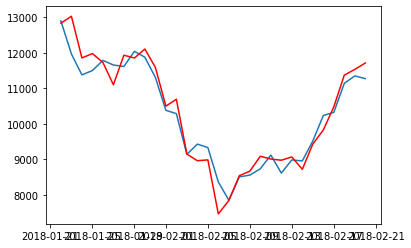

In [60]:
plt.plot(test_y)
plt.plot(predictions, color='red')

In [61]:
data = train
predicts1 = []
for t in test:
    model_ar = AR(data)
    model_ar_fit = model_ar.fit()
    y=model_ar_fit.predict(start=len(data), end = len(train)+len(test)-1)
    print(y.values[0])
    predicts1.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
print(predicts1)

C:\Users\pravi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


-63.55519403015026
1000.9959835189856
331.01788798151046
482.91315195430496
168.68921269176903
-777.0210818190116
203.4967643404449
36.451346968854
-153.0338120560851
-180.91137463336452
-223.51138526943257
285.19397373015005
-76.44179493852742
-310.82870286580464
117.81937909843
-821.0027385177968
-203.12297482754806
269.9262903525159
-310.69470497457496
-565.015491902303
-313.13920765965344
-324.41740088332745
63.505016573004696
125.61422623159517
219.988153020392
217.17355580807444
402.4618476211341
120.52385621599201
124.55337609589132
-71.41800611234294
[-63.55519403015026, 1000.9959835189856, 331.01788798151046, 482.91315195430496, 168.68921269176903, -777.0210818190116, 203.4967643404449, 36.451346968854, -153.0338120560851, -180.91137463336452, -223.51138526943257, 285.19397373015005, -76.44179493852742, -310.82870286580464, 117.81937909843, -821.0027385177968, -203.12297482754806, 269.9262903525159, -310.69470497457496, -565.015491902303, -313.13920765965344, -324.417400883327

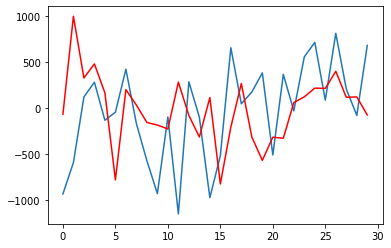

In [62]:
plt.plot(test.values)
plt.plot(predicts1, color='red')

In [63]:
mse3 = mean_squared_error(test,predicts1)
mse3

401078.3054191896

## Lets Build the ARIMA model

In [3]:
bitcoin_price_high = bitcoin_price.iloc[:,[0,2]]
bitcoin_price_high.head()

,Date,High
0,2013-04-28,135.98
1,2013-04-29,147.49
2,2013-04-30,146.93
3,2013-05-01,139.89
4,2013-05-02,125.60


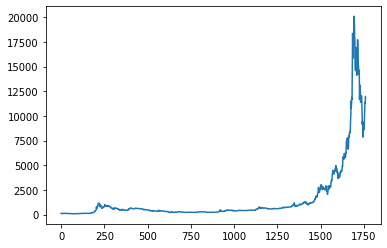

In [4]:
plt.plot(bitcoin_price_high.High)

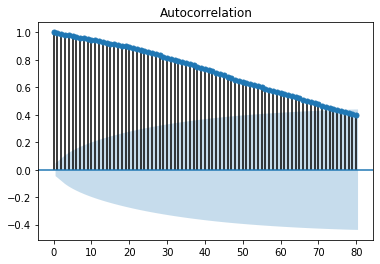

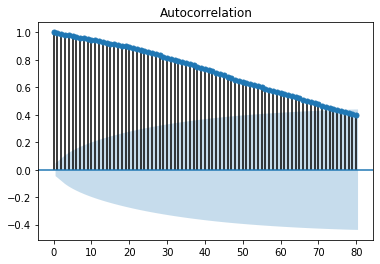

In [5]:
# Lets plot the AutoCorrelation Plot
plot_acf(bitcoin_price_high.High, lags=80)

* Lets take the lag value for p as 24

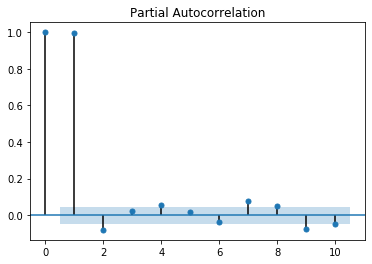

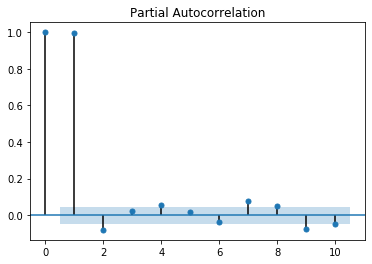

In [6]:
# Lets find the q value using pacf plot
plot_pacf(bitcoin_price_high.High, lags=10)

* here we take q vaue as 2
* we will take d value as 1

In [7]:
model1 = ARIMA(bitcoin_price_high.High, order = (24,1,2))
model1_fit = model1.fit()

In [8]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.High   No. Observations:                 1759
Model:                ARIMA(24, 1, 2)   Log Likelihood              -11576.998
Method:                       css-mle   S.D. of innovations            174.355
Date:                Mon, 08 Jun 2020   AIC                          23209.997
Time:                        17:20:34   BIC                          23363.227
Sample:                             1   HQIC                         23266.626
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8423      7.672      0.892      0.373      -8.195      21.880
ar.L1.D.High     -1.2319      0.026    -47.939      0.000      -1.282      -1.182
ar.L2.D.High     -0.6997      0.039    -18.041      0.000      -0.776      -0.624
ar.L3.D.High     -0.0087      0.041     -0.213      0.832      -0.089       0.072
ar.L4.D.High     -0.0887      0.040     -2.215      0.027      -0.167      -0.010
ar.L5.D.High      0.2018      0.039      5.131      0.000       0.125       0.279
ar.L6.D.High      0.2096      0.040      5.280      0.000       0.132       0.287
ar.L7.D.High      0.0650      0.040      1.624      0.104      -0.013       0.143
ar.L8.D.High      0.1786      0.040      4.478      0.000       0.100       0.257
ar.L9.D.High      0.3035      0.040      7.591      0.000       0.225       0.382
ar.L10.D.High     0.3679      0.040      9.182      0.000       0.289       0.446
ar.L11.D.High     0.1844      0.041      4.521      0.000       0.104       0.264
ar.L12.D.High    -0.0423      0.041     -1.038      0.299      -0.122       0.038
ar.L13.D.High    -0.2361      0.041     -5.773      0.000      -0.316      -0.156
ar.L14.D.High    -0.2077      0.041     -5.064      0.000      -0.288      -0.127
ar.L15.D.High    -0.2847      0.040     -7.088      0.000      -0.363      -0.206
ar.L16.D.High    -0.2352      0.040     -5.870      0.000      -0.314      -0.157
ar.L17.D.High    -0.2036      0.040     -5.027      0.000      -0.283      -0.124
ar.L18.D.High    -0.1381      0.041     -3.389      0.001      -0.218      -0.058
ar.L19.D.High     0.0314      0.041      0.770      0.442      -0.049       0.111
ar.L20.D.High     0.3111      0.041      7.663      0.000       0.232       0.391
ar.L21.D.High     0.3692      0.041      8.910      0.000       0.288       0.450
ar.L22.D.High     0.2419      0.042      5.694      0.000       0.159       0.325
ar.L23.D.High     0.0941      0.040      2.333      0.020       0.015       0.173
ar.L24.D.High    -0.0434      0.027     -1.622      0.105      -0.096       0.009
ma.L1.D.High      1.4861      0.010    150.400      0.000       1.467       1.506
ma.L2.D.High      0.9607      0.011     91.371      0.000       0.940       0.981
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1105           -0.0898j            1.1141           -0.4872
AR.2            -1.1105           +0.0898j            1.1141            0.4872
AR.3            -0.9772           -0.4485j            1.0752           -0.4315
AR.4            -0.9772           +0.4485j            1.0752            0.4315
AR.5            -0.7892           -0.6244j            1.0063           -0.3935
AR.6            -0.7892           +0.6244j            1.0063          

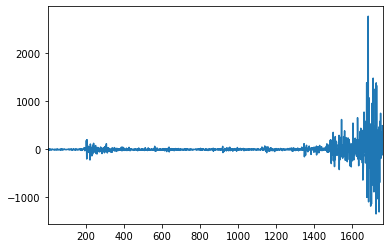

In [9]:
residuals = model1_fit.resid
residuals.plot()

In [10]:
residuals.describe()

count    1759.000000
mean       -0.027568
std       174.405471
min     -1346.298551
25%       -11.489391
50%        -3.777084
75%         4.909736
max      2774.118660
dtype: float64

In [24]:
output = model1_fit.forecast()
output

(array([11543.135759]),
 array([174.3552069]),
 array([[11201.40583295, 11884.86568504]]))

In [19]:
model1_fit.forecast(5)

(array([11543.135759  , 11830.67206329, 11897.23966769, 11784.50647365,
        11978.15984492]),
 array([174.3552069 , 279.68432312, 349.49931667, 396.97615748,
        446.80194916]),
 array([[11201.40583295, 11884.86568504],
        [11282.50086293, 12378.84326365],
        [11212.23359439, 12582.24574099],
        [11006.44750225, 12562.56544504],
        [11102.44411635, 12853.87557349]]))

# Lets import the rest of the Cryptocurrency Data

In [45]:
bitcoin_cash = pd.read_csv('D:/Msc CS Project Final/Dataset/bitcoin_cash_price.csv', header=0, parse_dates=[0], index_col=[0])
ethereum = pd.read_csv('D:/Msc CS Project Final/Dataset/ethereum_price.csv', header=0, parse_dates=[0],index_col=[0])
ripple = pd.read_csv('D:/Msc CS Project Final/Dataset/ripple_price.csv', header=0, parse_dates=[0],index_col=[0])
iota = pd.read_csv('D:/Msc CS Project Final/Dataset/iota_price.csv', header=0, parse_dates=[0],index_col=[0])
dash = pd.read_csv('D:/Msc CS Project Final/Dataset/dash_price.csv', header=0, parse_dates=[0],index_col=[0])
monero = pd.read_csv('D:/Msc CS Project Final/Dataset/monero_price.csv', header=0, parse_dates=[0],index_col=[0])

In [46]:
print(bitcoin_cash.head())
print(ethereum.head())
print(ripple.head())
print(iota.head())
print(dash.head())
print(monero.head())

              Open    High     Low   Close     Volume  Market Cap
Date                                                             
2017-07-23  555.89  578.97  411.78  413.06    85013.0         0.0
2017-07-24  412.58  578.89  409.21  440.70   190952.0         0.0
2017-07-25  441.35  541.66  338.09  406.90   524908.0         0.0
2017-07-26  407.08  486.16  321.79  365.82  1784640.0         0.0
2017-07-27  417.10  460.97  367.78  385.48   533207.0         0.0
                Open      High       Low     Close     Volume   Market Cap
Date                                                                      
2015-07-08  2.830000  3.540000  2.520000  2.770000   164329.0          0.0
2015-08-08  2.790000  2.800000  0.714725  0.753325   674188.0  167911000.0
2015-09-08  0.706136  0.879810  0.629191  0.701897   532170.0   42637600.0
2015-10-08  0.713989  0.729854  0.636546  0.708448   405283.0   43130000.0
2015-11-08  0.708087  1.130000  0.663235  1.070000  1463100.0   42796500.0
             

In [47]:
ethereum=ethereum.loc['2017-06-13':]
ripple = ripple.loc['2017-06-13':]
dash=dash.loc['2017-06-13':]
monero = monero.loc['2017-06-13']

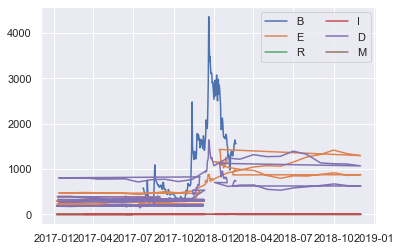

In [48]:

sns.set()
plt.plot(bitcoin_cash.High)
plt.plot(ethereum.High)
plt.plot(ripple.High)
plt.plot(iota.High)
plt.plot(dash.High)
plt.plot(monero.High)
plt.legend('BERIDM', ncol=2)

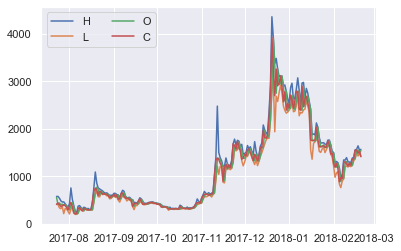

In [49]:
sns.set()
plt.plot(bitcoin_cash.High)
plt.plot(bitcoin_cash.Low)
plt.plot(bitcoin_cash.Open)
plt.plot(bitcoin_cash.Close)
plt.legend('HLOC', ncol=2)

In [50]:
data = [['Bitcoin',bitcoin_price['Market Cap'].mean()],['Bitcoin Cash',bitcoin_cash['Market Cap'].mean()],['Ethereum',ethereum['Market Cap'].mean()],['Ripple',ripple['Market Cap'].mean()],['Iota', iota['Market Cap'].mean()],['Dash',dash['Market Cap'].mean()],['Monero',monero['Market Cap'].mean()]]

In [61]:
Cryptocurrency_Market_Capital = pd.DataFrame(data, columns=['Cryptocurrency','Market Capital'])

In [62]:
Cryptocurrency_Market_Capital

,Cryptocurrency,Market Capital
0,Bitcoin,2.381454e+10
1,Bitcoin Cash,1.825384e+10
2,Ethereum,4.650720e+10
3,Ripple,2.131336e+10
4,Iota,3.788652e+09
5,Dash,3.704393e+09
6,Monero,7.279750e+08


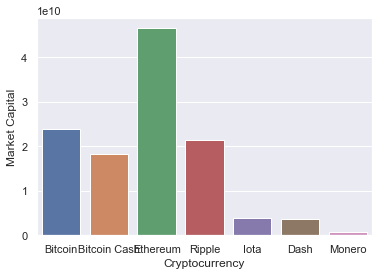

In [63]:
sns.barplot(x = 'Cryptocurrency', y = 'Market Capital', data=Cryptocurrency_Market_Capital)

* We can intrepret that Ethereum has the Highest Market Capital and Bitcoin stands Seconds in the Market